In [18]:
import pickle

import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


In [3]:
digits = load_digits()
digits.images.shape


(1797, 8, 8)

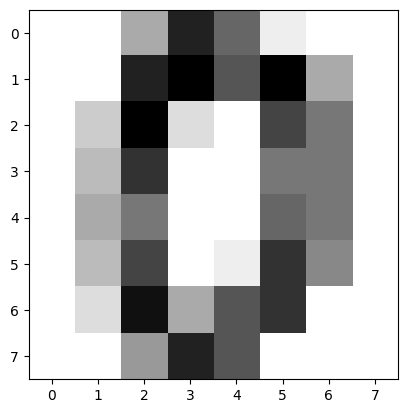

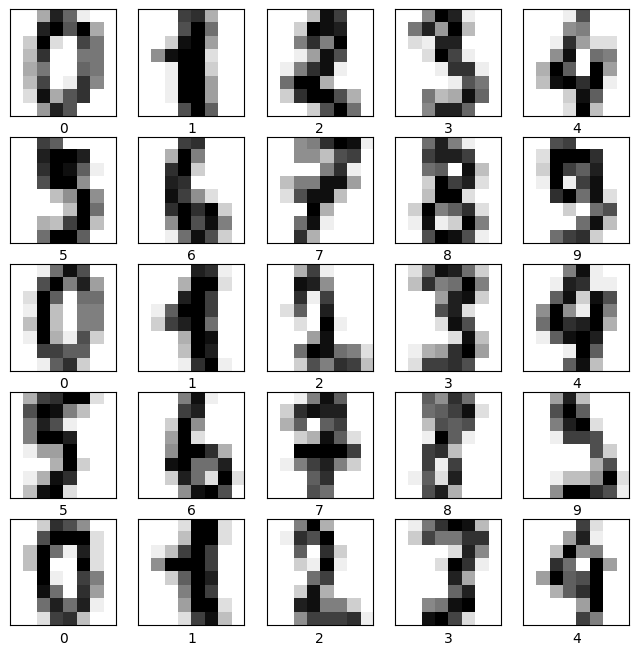

In [4]:
set(digits.target)



#
# Ejemplo de una imagen
#
plt.figure()
plt.imshow(digits.images[0], cmap=plt.cm.binary)
plt.grid(False)
plt.show()



plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(digits.images[i], cmap=plt.cm.binary)
    plt.xlabel(digits.target[i])
plt.show()

In [9]:
data = digits.images.reshape(digits.images.shape[0], -1)
target = digits.target

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.5, shuffle=False)
model = LogisticRegression(max_iter=10000)
model.fit(data_train, target_train)


LogisticRegression(max_iter=10000)

In [10]:

with open("estimator.pkl", "wb") as file:
    pickle.dump(model, file)

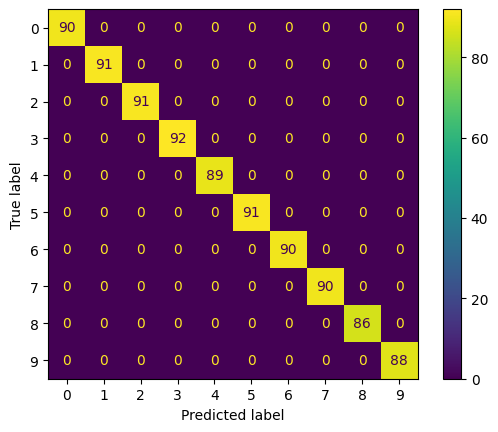

In [23]:
accuracy_score(target_train, model.predict(data_train))
ConfusionMatrixDisplay.from_estimator(model, data_train, target_train)

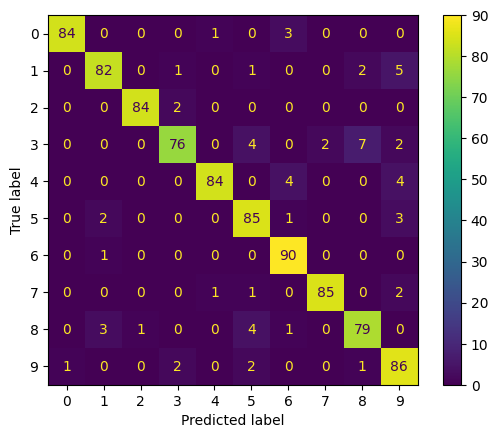

In [24]:
accuracy_score(target_test, model.predict(data_test))
ConfusionMatrixDisplay.from_estimator(model, data_test, target_test)    

In [25]:
def plot_image(i, predicted_label, true_label, predicted_proba, img):

    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    #
    plt.imshow(img, cmap=plt.cm.binary)

    if predicted_label[i] == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            predicted_label[i],
            100 * max(predicted_proba[i, :]),
            true_label,
        ),
        color=color,
    )


def plot_value_array(i, predicted_proba, predicted_label, true_label):
    #
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predicted_proba[i, :], color="#777777")
    plt.ylim([0, 1])
    #
    thisplot[predicted_label[i]].set_color("red")
    thisplot[true_label[i]].set_color("blue")
    

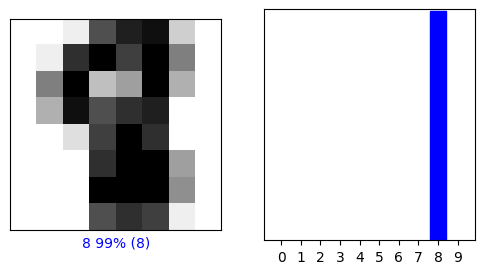

In [28]:
predictions = model.predict(data_test)
predicted_proba = model.predict_proba(data_test)

i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(
    i,
    predictions,
    target_test,
    predicted_proba,
    data_test.reshape(len(data_test), 8, 8),
)
plt.subplot(1, 2, 2)
plot_value_array(
    i,
    predicted_proba,
    predictions,
    target_test,
)

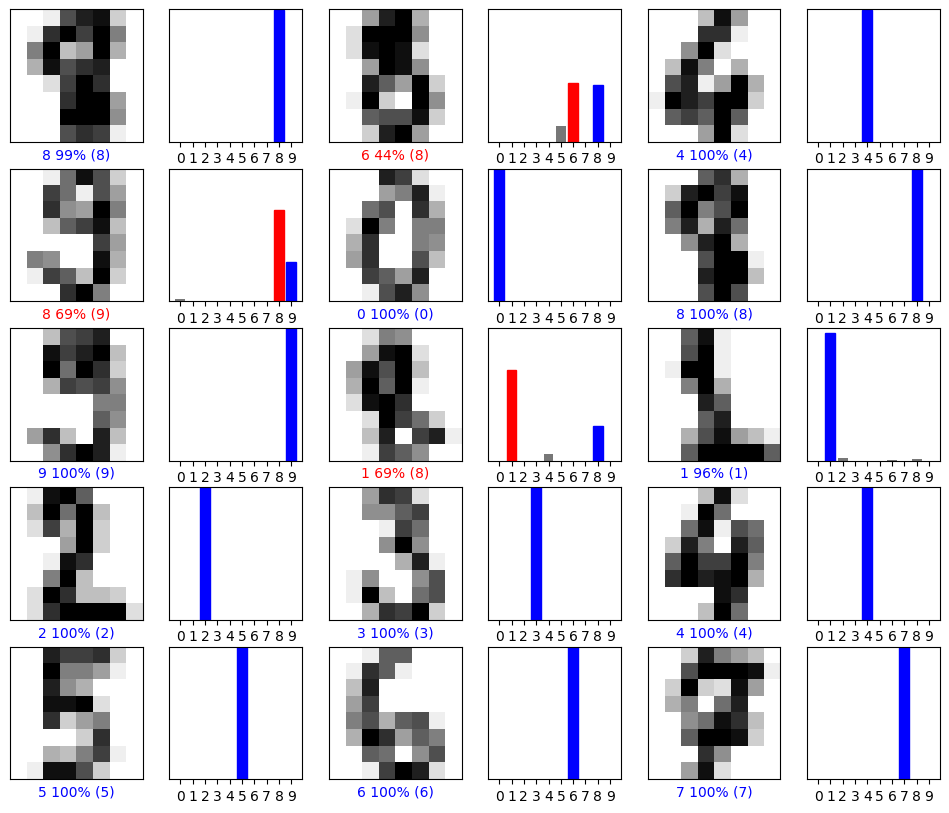

In [30]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(
        i,
        predictions,
        target_test,
        predicted_proba,
        data_test.reshape(len(data_test), 8, 8),
    )
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(
        i,
        predicted_proba,
        predictions,
        target_test,
    )